In [44]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
import matplotlib.pyplot as plt

In [3]:
tf.__version__, hub.__version__

('2.10.0', '0.8.0')

In [4]:
labels_csv = pd.read_csv("dog-breed-identification/labels.csv")
labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


<Axes: xlabel='breed'>

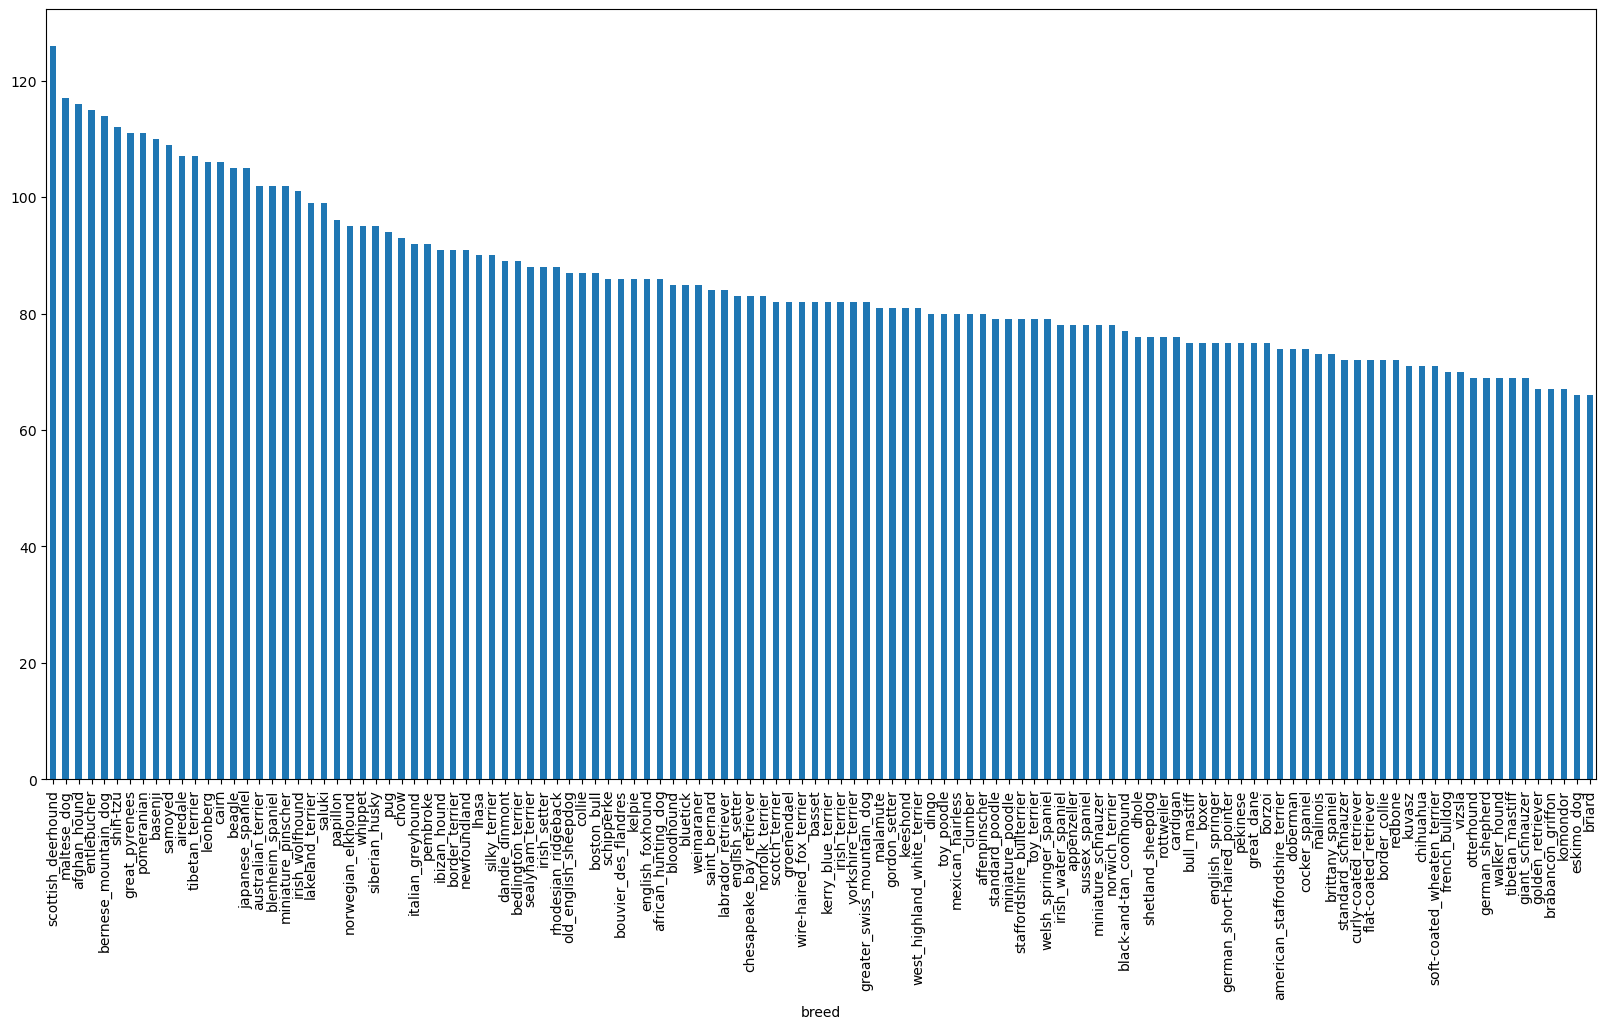

In [5]:
labels_csv["breed"].value_counts().plot.bar(figsize = (20, 10))

In [6]:
labels_csv["breed"].value_counts().median()

82.0

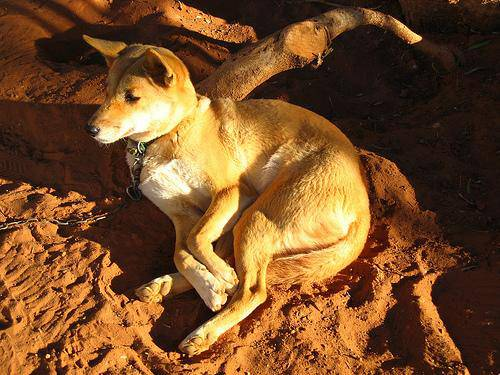

In [7]:
# Let's view an image
from IPython.display import Image
Image("dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

In [56]:
labels_csv.shape

(10222, 2)

In [8]:
# create a pathname for image ID's
filename = ["dog-breed-identification/train/" + fname + ".jpg" for fname in labels_csv["id"]]
filename

['dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 'dog-breed-identification/train/004396df1acd0f1247b740ca2b14616e.jpg',
 'dog-breed-identification/train/0067dc3eab0b3c3ef0439477624d85d6.jpg',
 'dog-breed-identification/train/00693b8bc2470375cc744a6391d397ec.jpg',
 'dog-breed-identification/train/006cc3ddb9dc1bd827479569fcdc52d

In [9]:
import os
len(os.listdir("dog-breed-identification/train/"))

10222

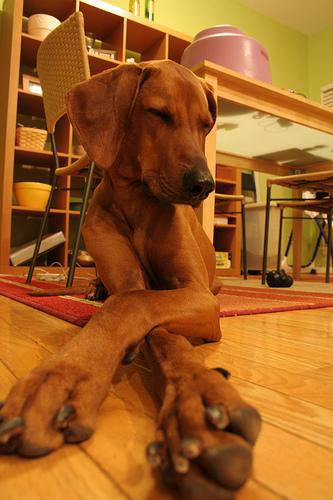

In [10]:
Image(filename[17])

In [11]:
len(filename)

10222

In [12]:
labels = labels_csv["breed"].to_numpy()

In [13]:
# Find the unique labels
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [14]:
len(labels)

10222

In [15]:
labels[0] == unique_breeds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

The above array is showing true value for the breed which there in the label and the rest are false.

In [16]:
# Turn every labels into boolean array
boolean_labels = [label == unique_breeds for label in labels]
len(boolean_labels)  # this is the same array as the above one just for each 10222 labels

10222

In [17]:
# Turning boolean array into integers
print(labels[0])
print(np.where(unique_breeds == labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19], dtype=int64),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own validation set

In [18]:
# Setup x and y variable
x = filename
y = boolean_labels

In [19]:
# set the number of images for experimeting
NUM_IMAGES = 1000 #@param {type: "slider", min: 1000, max: 10000}

In [20]:
# Split the data into train and validation set
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size = 0.2,
                                                  random_state = 42)

In [21]:
len(x_train), len(x_val)

(800, 200)

### Turning images into tensors (preprocessing images)


In [22]:
# Convert images into numpy array
from matplotlib.pyplot import imread
image = imread(filename[17])
image.dtype

dtype('uint8')

In [23]:
image.shape

(500, 333, 3)

In [24]:
image.max(), image.min()

(255, 0)

In [25]:
# turn image into tensors
tf.constant(image)

<tf.Tensor: shape=(500, 333, 3), dtype=uint8, numpy=
array([[[221, 204,  96],
        [220, 202,  94],
        [219, 194,  91],
        ...,
        [182, 145,  64],
        [182, 145,  64],
        [182, 145,  64]],

       [[221, 204,  96],
        [223, 205,  97],
        [214, 189,  86],
        ...,
        [182, 145,  64],
        [182, 145,  64],
        [182, 145,  64]],

       [[220, 203,  95],
        [229, 208, 101],
        [206, 181,  78],
        ...,
        [181, 144,  63],
        [181, 144,  63],
        [181, 144,  63]],

       ...,

       [[223, 136,  41],
        [225, 138,  43],
        [225, 141,  45],
        ...,
        [225, 151,  52],
        [225, 151,  52],
        [225, 151,  52]],

       [[223, 136,  41],
        [225, 138,  43],
        [225, 141,  45],
        ...,
        [224, 150,  51],
        [224, 150,  51],
        [224, 150,  51]],

       [[223, 136,  41],
        [225, 138,  43],
        [225, 141,  45],
        ...,
        [222, 148,  4

In [26]:
image

array([[[221, 204,  96],
        [220, 202,  94],
        [219, 194,  91],
        ...,
        [182, 145,  64],
        [182, 145,  64],
        [182, 145,  64]],

       [[221, 204,  96],
        [223, 205,  97],
        [214, 189,  86],
        ...,
        [182, 145,  64],
        [182, 145,  64],
        [182, 145,  64]],

       [[220, 203,  95],
        [229, 208, 101],
        [206, 181,  78],
        ...,
        [181, 144,  63],
        [181, 144,  63],
        [181, 144,  63]],

       ...,

       [[223, 136,  41],
        [225, 138,  43],
        [225, 141,  45],
        ...,
        [225, 151,  52],
        [225, 151,  52],
        [225, 151,  52]],

       [[223, 136,  41],
        [225, 138,  43],
        [225, 141,  45],
        ...,
        [224, 150,  51],
        [224, 150,  51],
        [224, 150,  51]],

       [[223, 136,  41],
        [225, 138,  43],
        [225, 141,  45],
        ...,
        [222, 148,  49],
        [222, 148,  49],
        [222, 148,  49]]

In [27]:
# Define image size 
IMAGE_SIZE = 128

# preprocessing images
def preprocess_image(image_path, img_size = IMAGE_SIZE):
    # read in an image file
    image = tf.io.read_file(image_path)

    # turn the jpeg image into numerical tensors with 3 channels (RGB)
    image = tf.image.decode_jpeg(image, channels = 3)

    # Convert the color channel values from 0-225 to 0-1
    image = tf.image.convert_image_dtype(image, tf.float32)
    
    # Resize the imagee to our desired value
    image = tf.image.resize(image, size = [IMAGE_SIZE, IMAGE_SIZE])
    
    return image

In [28]:
image = tf.io.read_file(filename[17])
image

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x01\xf4\x01M\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca

In [29]:
image = tf.image.decode_jpeg(image, channels = 3)
image

<tf.Tensor: shape=(500, 333, 3), dtype=uint8, numpy=
array([[[220, 203,  95],
        [220, 202,  94],
        [219, 194,  91],
        ...,
        [181, 145,  61],
        [181, 145,  61],
        [181, 145,  61]],

       [[220, 203,  95],
        [222, 204,  96],
        [213, 188,  85],
        ...,
        [181, 145,  61],
        [181, 145,  61],
        [181, 145,  61]],

       [[220, 204,  93],
        [226, 208, 100],
        [206, 181,  78],
        ...,
        [181, 145,  61],
        [181, 145,  61],
        [181, 145,  61]],

       ...,

       [[221, 137,  39],
        [222, 138,  40],
        [224, 140,  42],
        ...,
        [225, 152,  50],
        [225, 152,  50],
        [225, 152,  50]],

       [[221, 137,  39],
        [222, 138,  40],
        [224, 140,  42],
        ...,
        [223, 150,  48],
        [223, 150,  48],
        [223, 150,  48]],

       [[221, 137,  39],
        [222, 138,  40],
        [224, 140,  42],
        ...,
        [222, 149,  4

In [30]:
image = tf.image.convert_image_dtype(image, tf.float32)
image

<tf.Tensor: shape=(500, 333, 3), dtype=float32, numpy=
array([[[0.86274517, 0.7960785 , 0.37254903],
        [0.86274517, 0.79215693, 0.36862746],
        [0.8588236 , 0.7607844 , 0.35686275],
        ...,
        [0.70980394, 0.5686275 , 0.2392157 ],
        [0.70980394, 0.5686275 , 0.2392157 ],
        [0.70980394, 0.5686275 , 0.2392157 ]],

       [[0.86274517, 0.7960785 , 0.37254903],
        [0.8705883 , 0.8000001 , 0.37647063],
        [0.8352942 , 0.7372549 , 0.33333334],
        ...,
        [0.70980394, 0.5686275 , 0.2392157 ],
        [0.70980394, 0.5686275 , 0.2392157 ],
        [0.70980394, 0.5686275 , 0.2392157 ]],

       [[0.86274517, 0.8000001 , 0.3647059 ],
        [0.8862746 , 0.81568635, 0.3921569 ],
        [0.8078432 , 0.70980394, 0.30588236],
        ...,
        [0.70980394, 0.5686275 , 0.2392157 ],
        [0.70980394, 0.5686275 , 0.2392157 ],
        [0.70980394, 0.5686275 , 0.2392157 ]],

       ...,

       [[0.86666673, 0.5372549 , 0.15294118],
        [0.87

In [31]:
image = tf.image.resize(image, size = [128, 128])
image

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.87471765, 0.80526465, 0.38067317],
        [0.64803994, 0.52642536, 0.13900194],
        [0.5503023 , 0.40949902, 0.05834458],
        ...,
        [0.71587706, 0.5747006 , 0.24528882],
        [0.70980394, 0.5686275 , 0.2392157 ],
        [0.70980394, 0.5686275 , 0.2392157 ]],

       [[0.8910741 , 0.81078416, 0.3934944 ],
        [0.5524687 , 0.41896617, 0.03603133],
        [0.57620156, 0.42329106, 0.06643929],
        ...,
        [0.70840013, 0.56722367, 0.2378119 ],
        [0.7019608 , 0.56078434, 0.23137257],
        [0.7019608 , 0.56078434, 0.23137257]],

       [[0.80508703, 0.710241  , 0.33056188],
        [0.58999574, 0.44214588, 0.09914647],
        [0.5718566 , 0.4071773 , 0.07983758],
        ...,
        [0.7058824 , 0.5647059 , 0.23529413],
        [0.7048407 , 0.56366426, 0.23425247],
        [0.7048407 , 0.56366426, 0.23425247]],

       ...,

       [[0.8755515 , 0.5675858 , 0.18431373],
        [0.87

In [32]:
# simple function to return image, label tuple
def get_image_label(image, label):
    image = preprocess_image(image)
    return image, label

Batchify the dataset so that it becomes easier for tensorflow to process images of just batch size at a time

In [33]:
BATCH_SIZE = 32
def create_data_batches(x, y = None, batch_size = BATCH_SIZE, valid_data = False, test_data = False):
    """Shuffles the training data."""
    if test_data:
        print("Creating test Data Batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x)))  # test data has no labels, only pathnames
        data_batch = data.map(preprocess_image).batch(BATCH_SIZE)
        return data_batch
    elif valid_data:
        print("Creating validation data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                                  tf.constant(y))) 
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch
    else:
        print("Creating training data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                                  tf.constant(y)))
        data = data.shuffle(buffer_size = len(x)) 
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch

In [34]:
y_val

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [35]:
# creating validation and training data batches
train_data = create_data_batches(x = x_train, y = y_train)
valid_data = create_data_batches(x = x_val, y = y_val, valid_data = True)

Creating training data batches...
Creating validation data batches...


In [43]:
train_data.element_spec

(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))

In [42]:
y[0].dtype

dtype('bool')

### Visualize Data Batches

In [54]:
# Write a function to visualize 30 images of the data batches
def show_images(images, labels):
    # setup figure
    plt.figure(figsize = (12, 12))
    for i in range(30):
        # create a subplot (6 rows, 5 columns)
        ax = plt.subplot(6, 5, i+1)
        plt.imshow(images[i])
        plt.title(unique_breeds[labels[i].argmax()])
        plt.axis("off")

In [45]:
unique_breeds[y[0].argmax()]

'boston_bull'

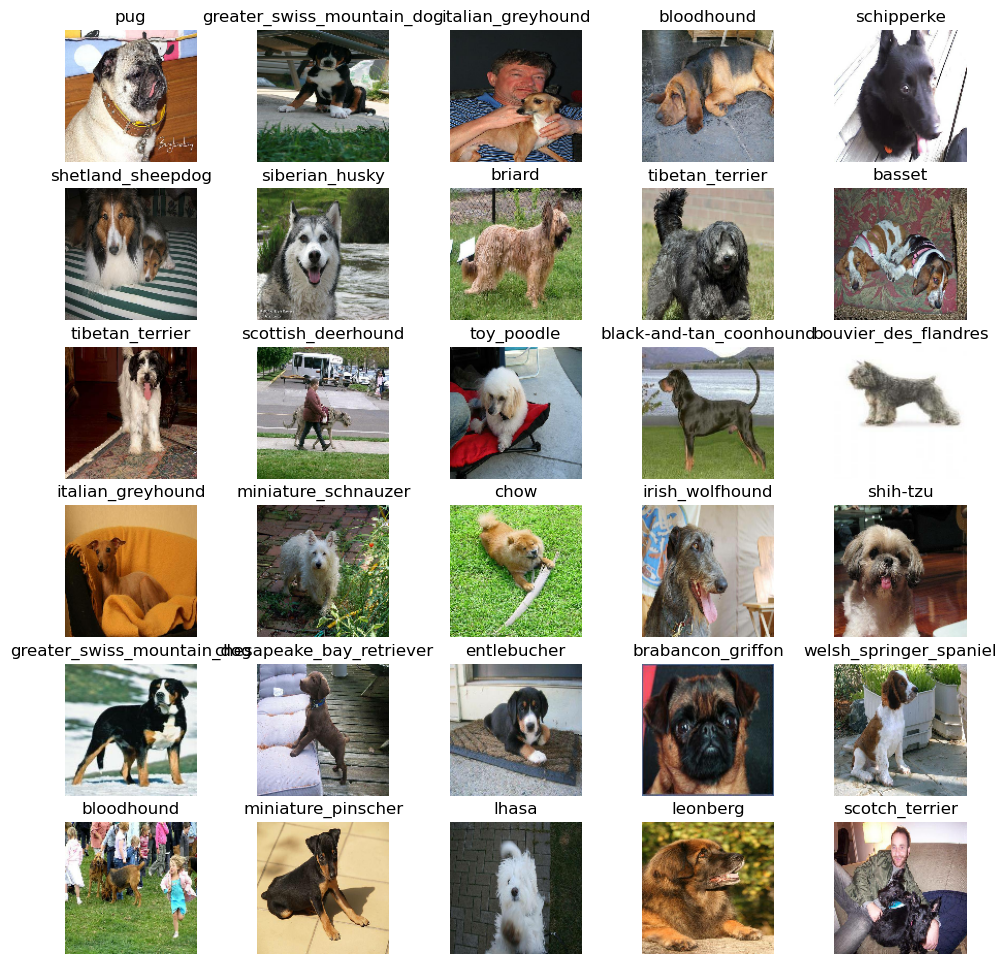

In [55]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_images(train_images, train_labels)

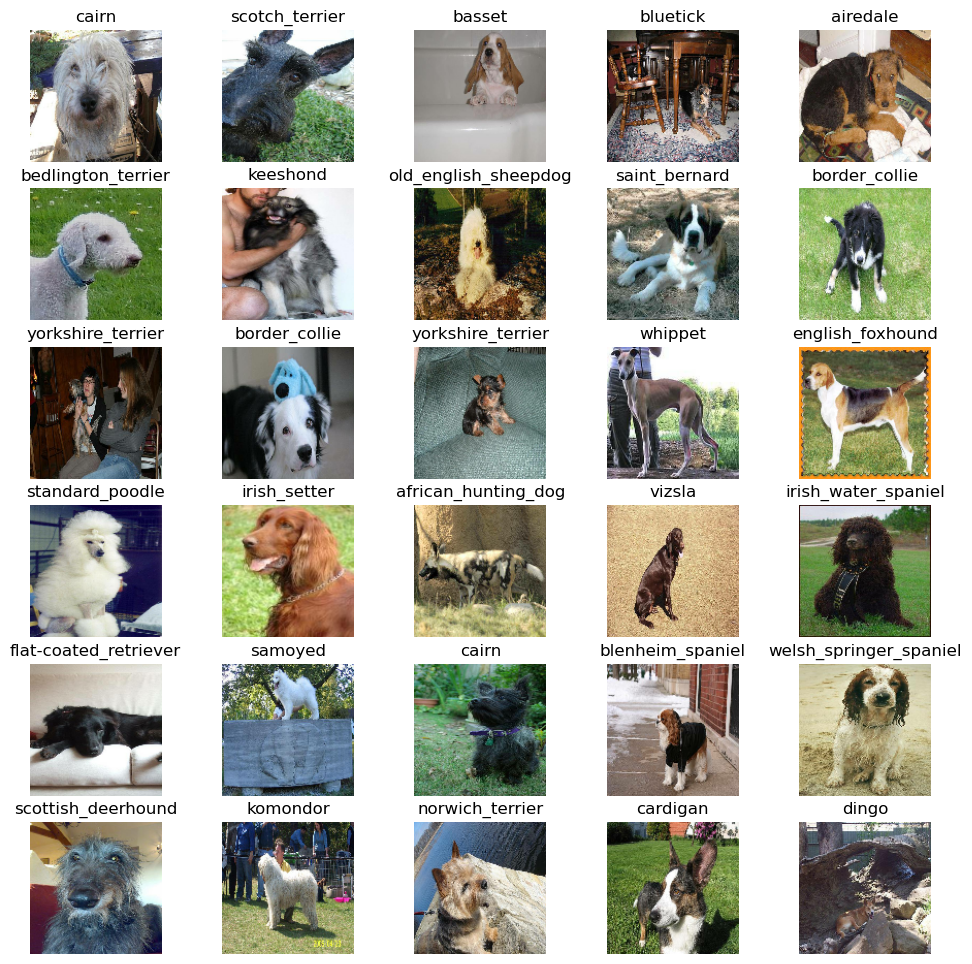

In [57]:
# let's visualize the validation data batches
val_images, val_labels = next(valid_data.as_numpy_iterator())
show_images(val_images, val_labels)

Now let's get into the most crucial and interesting part of this project, model building.

In [80]:
INPUT_SHAPE = [None, IMAGE_SIZE, IMAGE_SIZE, 3]
OUTPUT_SHAPE = len(unique_breeds)

In [145]:
from pyexpat import model
from keras.models import Sequential
from keras.layers import Dense
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE):
    print("Building model with: ", "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-128-classification/2")
  # Setup the model layers
    model = tf.keras.Sequential([
        hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-128-classification/2"),   # Layer 1 (input layer)
        tf.keras.layers.Dense(units = OUTPUT_SHAPE,
                                activation = "softmax")      # Layer 2 (output layer)
    ])

    # Compile the model
    model.compile(
        loss = tf.keras.losses.CategoricalCrossentropy(),
        optimizer = tf.keras.optimizers.Adam(),
        metrics = ["accuracy"]
    )

    # Build the model
    model.build(INPUT_SHAPE)

    return model

In [146]:
model = create_model()
model.summary()

Building model with:  https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-128-classification/2
Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1001)              1692489   
                                                                 
 dense_98 (Dense)            (None, 120)               120240    
                                                                 
Total params: 1,812,729
Trainable params: 120,240
Non-trainable params: 1,692,489
_________________________________________________________________


In [144]:
model2 = create_model()
model2.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 128, 128, 64)      256       
                                                                 
 dense_97 (Dense)            (None, 128, 128, 120)     7800      
                                                                 
Total params: 8,056
Trainable params: 8,056
Non-trainable params: 0
_________________________________________________________________


### Creating callbacks

#### Create an early stopping callback

In [114]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy",
                                                  patience = 3)

#### Create a tensorboard callback

In [115]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [116]:
import datetime
def create_tensorboard_callback():
    logdir = os.path.join("dog-breed-identification/logs",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    return tf.keras.callbacks.TensorBoard(logdir)

In [117]:
# Create a function to train a model
def train_model():
    model = create_model()
    # create a tensorboard callback
    tensorboard = create_tensorboard_callback()
    model.fit(x = train_data,
              epochs = 100,
              validation_data = valid_data,
              callbacks = [tensorboard, early_stopping])
    return model

In [147]:
# Are you ready... set... and go
model = train_model()

Building model with:  https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-128-classification/2
Epoch 1/100
25/25 [==============================] - 15s 203ms/step - loss: 5.5687 - accuracy: 0.0350 - val_loss: 4.5768 - val_accuracy: 0.0650
Epoch 2/100
25/25 [==============================] - 3s 136ms/step - loss: 2.3379 - accuracy: 0.4375 - val_loss: 3.5688 - val_accuracy: 0.1800
Epoch 3/100
25/25 [==============================] - 4s 137ms/step - loss: 1.0445 - accuracy: 0.8112 - val_loss: 3.3793 - val_accuracy: 0.2200
Epoch 4/100
25/25 [==============================] - 4s 141ms/step - loss: 0.4839 - accuracy: 0.9550 - val_loss: 3.3505 - val_accuracy: 0.2550
Epoch 5/100
25/25 [==============================] - 4s 139ms/step - loss: 0.2634 - accuracy: 0.9962 - val_loss: 3.3381 - val_accuracy: 0.2450
Epoch 6/100
25/25 [==============================] - 3s 137ms/step - loss: 0.1631 - accuracy: 1.0000 - val_loss: 3.3666 - val_accuracy: 0.2300
Epoch 7/100
25/25 [=============